In [1]:
#importing libraries

import pandas as pd 

#### Task 1: DATA CLEANING of `brasil-real-estate-1.csv` raw data.

Task 1.1: Import the CSV file into the DataFrame `df1`.

In [2]:
#importing the csv file

file_path = 'C:\\Users\\USER\\Desktop\\GSRA DS project\\brasil-real-estate-1.csv'
df1 = pd.read_csv(file_path)

Task 1.2: Before you move to the next task, take a moment to inspect df1 using the info and head methods. What issues do you see in the data? What cleaning will you need to do before you can conduct your analysis?

In [3]:
# Displaying info for df1
df1.info()

# Displaying the first few rows of df1
df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12834 entries, 0 to 12833
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   property_type            12834 non-null  object 
 1   place_with_parent_names  12834 non-null  object 
 2   region                   12834 non-null  object 
 3   lat-lon                  11551 non-null  object 
 4   area_m2                  12834 non-null  float64
 5   price_usd                12834 non-null  object 
dtypes: float64(1), object(5)
memory usage: 601.7+ KB


,property_type,place_with_parent_names,region,lat-lon,area_m2,price_usd
0,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6443051,-35.7088142",110.0,"$187,230.85"
1,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6430934,-35.70484",65.0,"$81,133.37"
2,house,|Brasil|Alagoas|Maceió|,Northeast,"-9.6227033,-35.7297953",211.0,"$154,465.45"
3,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.622837,-35.719556",99.0,"$146,013.20"
4,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.654955,-35.700227",55.0,"$101,416.71"


In [4]:
#issues identified
"""
1. Data Types:
   - The 'lat-lon' column is of type object instead of a numeric type.
   - The 'price_usd' column is of type object and needs to be converted to a numeric type.

2. Missing Values:
   - The 'lat-lon' column has missing values.

3. Formatting:
   - The 'price_usd' column values have dollar symbols and commas.
   
"""

#Cleaning needed to do before analysis

"""
Cleaning Steps:

1. Convert 'lat-lon' to numeric type.

2. Handle Missing Values in 'lat-lon'.

3. Convert 'price_usd' to numeric type after removing symbols and commas.

Note: Further handling of missing values in 'lat-lon' may be necessary depending on the analysis.

"""

"\nCleaning Steps:\n\n1. Convert 'lat-lon' to numeric type.\n\n2. Handle Missing Values in 'lat-lon'.\n\n3. Convert 'price_usd' to numeric type after removing symbols and commas.\n\nNote: Further handling of missing values in 'lat-lon' may be necessary depending on the analysis.\n\n"

Task 1.3: Use the `"lat-lon"` column to create two separate columns in `df1`: `"lat"` and `"lon"`. Make sure that the data type for these new columns is `float`.

In [5]:
# Splitting 'lat-lon' column into 'lat' and 'lon' columns
df1[['lat', 'lon']] = df1['lat-lon'].str.split(',', expand=True)

# Converting 'lat' and 'lon' columns to float data type
df1['lat'] = pd.to_numeric(df1['lat'], errors='coerce')
df1['lon'] = pd.to_numeric(df1['lon'], errors='coerce')

# Displaying the updated DataFrame with 'lat' and 'lon' columns
df1.head()


,property_type,place_with_parent_names,region,lat-lon,area_m2,price_usd,lat,lon
0,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6443051,-35.7088142",110.0,"$187,230.85",-9.644305,-35.708814
1,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6430934,-35.70484",65.0,"$81,133.37",-9.643093,-35.704840
2,house,|Brasil|Alagoas|Maceió|,Northeast,"-9.6227033,-35.7297953",211.0,"$154,465.45",-9.622703,-35.729795
3,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.622837,-35.719556",99.0,"$146,013.20",-9.622837,-35.719556
4,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.654955,-35.700227",55.0,"$101,416.71",-9.654955,-35.700227


Task 1.4: Use the `"place_with_parent_names"` column to create a `"state"` column for `df1`. (Note that the state name always appears after `"|Brasil|"` in each string.)

In [6]:
# Extracting state name from 'place_with_parent_names' and creating a new 'state' column
df1['state'] = df1['place_with_parent_names'].str.extract(r'\|Brasil\|([^|]+)')

# Displaying the updated DataFrame with the new 'state' column
df1.head()

,property_type,place_with_parent_names,region,lat-lon,area_m2,price_usd,lat,lon,state
0,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6443051,-35.7088142",110.0,"$187,230.85",-9.644305,-35.708814,Alagoas
1,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6430934,-35.70484",65.0,"$81,133.37",-9.643093,-35.704840,Alagoas
2,house,|Brasil|Alagoas|Maceió|,Northeast,"-9.6227033,-35.7297953",211.0,"$154,465.45",-9.622703,-35.729795,Alagoas
3,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.622837,-35.719556",99.0,"$146,013.20",-9.622837,-35.719556,Alagoas
4,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.654955,-35.700227",55.0,"$101,416.71",-9.654955,-35.700227,Alagoas


Task 1.5: Transform the `"price_usd"` column of `df1` so that all values are floating-point numbers instead of strings.

In [7]:
# Transforming 'price_usd' column to floating-point numbers
df1['price_usd'] = pd.to_numeric(df1['price_usd'].replace('[\$,]', '', regex=True), errors='coerce')

# Displaying the updated DataFrame with the transformed 'price_usd' column
df1.head()

,property_type,place_with_parent_names,region,lat-lon,area_m2,price_usd,lat,lon,state
0,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6443051,-35.7088142",110.0,187230.85,-9.644305,-35.708814,Alagoas
1,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6430934,-35.70484",65.0,81133.37,-9.643093,-35.704840,Alagoas
2,house,|Brasil|Alagoas|Maceió|,Northeast,"-9.6227033,-35.7297953",211.0,154465.45,-9.622703,-35.729795,Alagoas
3,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.622837,-35.719556",99.0,146013.20,-9.622837,-35.719556,Alagoas
4,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.654955,-35.700227",55.0,101416.71,-9.654955,-35.700227,Alagoas


Task 1.6: Drop the `"lat-lon"` and `"place_with_parent_names"` columns from `df1`.

In [8]:
# Dropping lat-lon" and "place_with_parent_names columns from df1
df1 = df1.drop(columns=["lat-lon", "place_with_parent_names"])

# Displaying the updated df1
df1.head()

,property_type,region,area_m2,price_usd,lat,lon,state
0,apartment,Northeast,110.0,187230.85,-9.644305,-35.708814,Alagoas
1,apartment,Northeast,65.0,81133.37,-9.643093,-35.704840,Alagoas
2,house,Northeast,211.0,154465.45,-9.622703,-35.729795,Alagoas
3,apartment,Northeast,99.0,146013.20,-9.622837,-35.719556,Alagoas
4,apartment,Northeast,55.0,101416.71,-9.654955,-35.700227,Alagoas


Task 1.7: Give a short report on the data you now have.

In [ ]:
#Report on the data we now have 

"""
Data Overview
The dataset contains information about homes for sale in Brazil.
Columns include 'property_type', region', 'area_m2', 'price_usd', 'lat', 'lon', and 'state'.

Data Cleaning
I identified and addressed several issues in the data, including:
    Data types: Converted 'lat-lon' and 'price_usd' columns to numeric types.
    Missing values: handled missing values in 'lat-lon'.
    Formatting: Cleaned 'price_usd' values by removing symbols and commas.
    

New Columns
Created new columns:'lat' and 'lon' from the 'lat-lon' column.'state' extracted from the 'place_with_parent_names' column.

Dropped Columns
dropped the lat-lon and place_with_parent_names columns.

Transformations
Transformed the 'price_usd' column into floating-point numbers.

Data Quality
The dataset now has improved data quality and is better prepared for analysis. Missing values and data types have been addressed, 
and relevant information has been extracted into new columns.


"""

#### TASK 2: DATA CLEANING of `brasil-real-estate-2.csv` raw data.

Task 2.1: Import the CSV file `brasil-real-estate-2.csv` into the DataFrame `df2`

In [10]:
#importing the csv file

file_path = 'C:\\Users\\USER\\Desktop\\GSRA DS project\\brasil-real-estate-2.csv'
df2 = pd.read_csv(file_path)

Task 2.2: Before you jump to the next task, look at `df2` using the `info` and `head` methods. What issues do you see in the data? How is it similar or different from `df1`?

In [11]:
# Displaying info for df2
df2.info()

# Displaying the first few rows of df2
df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12833 entries, 0 to 12832
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  12833 non-null  object 
 1   state          12833 non-null  object 
 2   region         12833 non-null  object 
 3   lat            12833 non-null  float64
 4   lon            12833 non-null  float64
 5   area_m2        11293 non-null  float64
 6   price_brl      12833 non-null  float64
dtypes: float64(4), object(3)
memory usage: 701.9+ KB


,property_type,state,region,lat,lon,area_m2,price_brl
0,apartment,Pernambuco,Northeast,-8.134204,-34.906326,72.0,414222.98
1,apartment,Pernambuco,Northeast,-8.126664,-34.903924,136.0,848408.53
2,apartment,Pernambuco,Northeast,-8.125550,-34.907601,75.0,299438.28
3,apartment,Pernambuco,Northeast,-8.120249,-34.895920,187.0,848408.53
4,apartment,Pernambuco,Northeast,-8.142666,-34.906906,80.0,464129.36


In [ ]:
# Issues identified and similarities with df1

"""
Issues in df2:
1. The 'area_m2' column in df2 has missing values.

Similarities between df2 and df1:
1. Both DataFrames share common columns such as 'property_type', 'state', 'region', 'lat', 'lon', and 'area_m2'.
2. The data types of columns in both DataFrames seem relatively consistent. Object data types are used for categorical columns, and float64 data types are used for numerical columns.
3. Both DataFrames have the same number of entries (rows), with 12,833 rows in df2 and 12,834 rows in df1.
4. Both DataFrames contain geographical information, such as latitude ('lat') and longitude ('lon'), which can be useful for spatial analysis.
5. Both DataFrames provide information about the type of property ('property_type') and its size in square meters ('area_m2').

Differences between df2 and df1:
1. df2 does not have columns such as 'place_with_parent_names' and 'lat-lon,' which are present in df1.
2. df2 has missing values in the 'area_m2' column, whereas df1 does not have missing values in this column.
3. The representation of pricing information differs between the two DataFrames. df1 has 'price_usd' stored as an object with currency symbols, while df2 has 'price_brl' stored as float64.
4. The representation of state-related information differs. In df2, the 'state' information is directly available as a separate column, whereas in df1, it is inferred from 'place_with_parent_names'.
5. df1 has additional columns ('place_with_parent_names' and 'lat-lon') that are not present in df2.
"""


Task 2.3: Use the `price_brl` column to create a new column named `price_usd`. (Keep in mind that, when this data was collected in 2015 and 2016, a US dollar cost 3.19 Brazilian reals.)

In [13]:
# Creating a new column 'price_usd' by converting 'price_brl' using the conversion factor
df2['price_usd'] = df2['price_brl'] / 3.19

# Displaying the first few rows of the DataFrame to verify the changes
df2.head()


,property_type,state,region,lat,lon,area_m2,price_brl,price_usd
0,apartment,Pernambuco,Northeast,-8.134204,-34.906326,72.0,414222.98,129850.463950
1,apartment,Pernambuco,Northeast,-8.126664,-34.903924,136.0,848408.53,265958.786834
2,apartment,Pernambuco,Northeast,-8.125550,-34.907601,75.0,299438.28,93867.799373
3,apartment,Pernambuco,Northeast,-8.120249,-34.895920,187.0,848408.53,265958.786834
4,apartment,Pernambuco,Northeast,-8.142666,-34.906906,80.0,464129.36,145495.097179


Task 2.4: Drop the `"price_brl"` column from `df2`, as well as any rows that have `NaN` values.

In [14]:
# Dropping the 'price_brl' column from df2
df2 = df2.drop('price_brl', axis=1)

# Dropping rows with NaN values
df2 = df2.dropna()

# Displaying the first few rows of the updated DataFrame
df2.head()

,property_type,state,region,lat,lon,area_m2,price_usd
0,apartment,Pernambuco,Northeast,-8.134204,-34.906326,72.0,129850.463950
1,apartment,Pernambuco,Northeast,-8.126664,-34.903924,136.0,265958.786834
2,apartment,Pernambuco,Northeast,-8.125550,-34.907601,75.0,93867.799373
3,apartment,Pernambuco,Northeast,-8.120249,-34.895920,187.0,265958.786834
4,apartment,Pernambuco,Northeast,-8.142666,-34.906906,80.0,145495.097179


Task 2.5: Concatenate `df1` and `df2` to create a new DataFrame named `df`. 

In [15]:
# Concatenating df1 and df2 into a new DataFrame df
df = pd.concat([df1, df2], ignore_index=True)

# Displaying the shape and first few rows of the concatenated DataFrame
print(f"Shape of the concatenated DataFrame df: {df.shape}")
df.head()

Shape of the concatenated DataFrame df: (24127, 7)


,property_type,region,area_m2,price_usd,lat,lon,state
0,apartment,Northeast,110.0,187230.85,-9.644305,-35.708814,Alagoas
1,apartment,Northeast,65.0,81133.37,-9.643093,-35.704840,Alagoas
2,house,Northeast,211.0,154465.45,-9.622703,-35.729795,Alagoas
3,apartment,Northeast,99.0,146013.20,-9.622837,-35.719556,Alagoas
4,apartment,Northeast,55.0,101416.71,-9.654955,-35.700227,Alagoas


### TASK 3: EXPLORATION

In this section, you'll use your new data visualization skills to learn more about the regional differences in the Brazilian real estate market.

In [16]:
# Importing visualization libraries 
"""
(Note: While it's generally good practice to import all libraries at the beginning of the notebook, 
I decided to do it here for better context and explanation.)
"""

import matplotlib.pyplot as plt
import seaborn as sns

TASK 3.1: Use the `describe` method to create a DataFrame `summary_stats` with the summary statistics for the `"area_m2"` and `"price_usd"` columns.

In [17]:
# Specifying the summary statistics
selected_columns = ["area_m2", "price_usd"]

# Using the describe method to create summary statistics for the selected columns
summary_stats = df[selected_columns].describe()

# Displaying the summary statistics DataFrame
summary_stats


,area_m2,price_usd
count,24127.000000,24127.000000
mean,115.104903,194296.256654
std,47.807752,103307.477086
min,53.000000,74892.340000
25%,76.000000,112887.394624
50%,103.000000,165387.250000
75%,142.000000,246520.620000
max,252.000000,525659.717868


TASK 3.2: Create a histogram of `"price_usd"`. Make sure that the x-axis has the label `"Price [USD]"`, the y-axis has the label `"Frequency"`, and the plot has the title `"Distribution of Home Prices"`.

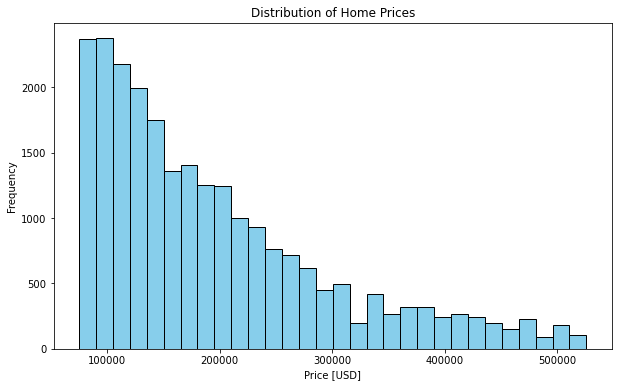

In [18]:
# Cleaning "price_usd" column by removing symbols
df["price_usd"] = df["price_usd"].replace('[\$,]', '', regex=True).astype(float)

# Plotting histogram using Matplotlib
plt.figure(figsize=(10, 6))
plt.hist(df["price_usd"], bins=30, color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel("Price [USD]")
plt.ylabel("Frequency")
plt.title("Distribution of Home Prices")

# Displaying the plot
plt.show()

TASK 3.3: Create a horizontal boxplot of `"area_m2"`. Make sure that the x-axis has the label `"Area [sq meters]"` and the plot has the title `"Distribution of Home Sizes"`.

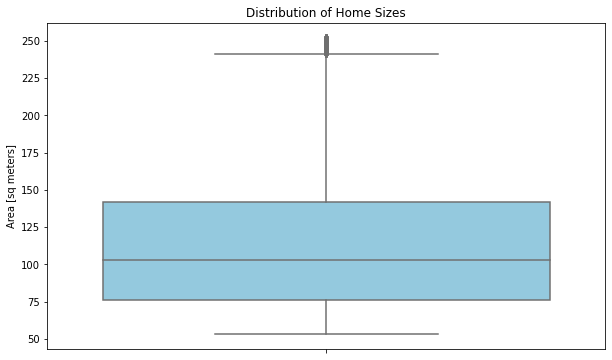

In [19]:
# Plotting horizontal boxplot using Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(y=df["area_m2"], color='skyblue')

# Adding labels and title
plt.ylabel("Area [sq meters]")
plt.title("Distribution of Home Sizes")

# Showing the plot
plt.show()

TASK 3.4: Use the `groupby` method to create a Series named `mean_price_by_region` that shows the mean home price in each region in Brazil, sorted from smallest to largest.

In [20]:
# Using groupby to calculate mean price by region and sorting the result
mean_price_by_region = df.groupby('region')['price_usd'].mean().sort_values()

# Displaying the resulting Series
mean_price_by_region

region
Central-West    178914.105712
North           180677.159206
Northeast       185308.218388
South           188247.049056
Southeast       208261.874123
Name: price_usd, dtype: float64

TASK 3.5: Use `mean_price_by_region` to create a bar chart. Make sure you label the x-axis as `"Region"` and the y-axis as `"Mean Price [USD]"` and give the chart the title `"Mean Home Price by Region"`.

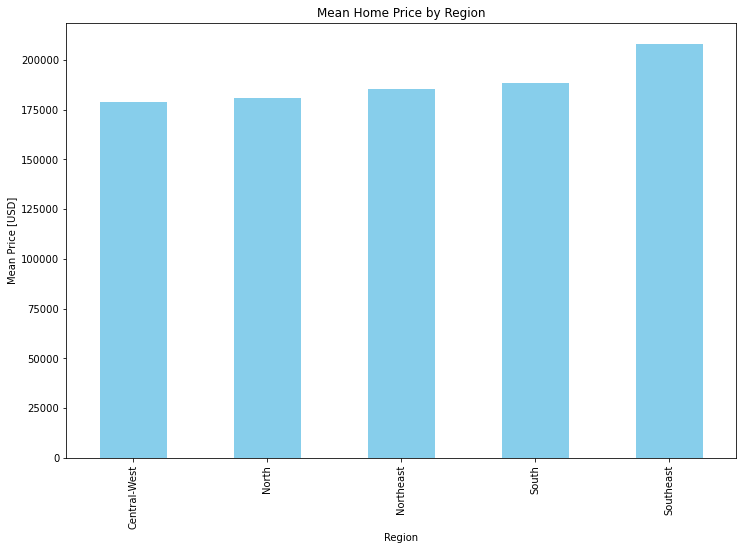

In [21]:
# Plotting the bar chart
plt.figure(figsize=(12, 8))
mean_price_by_region.plot(kind='bar', color='skyblue')

# Adding labels and title
plt.xlabel('Region')
plt.ylabel('Mean Price [USD]')
plt.title('Mean Home Price by Region')

# Displaying the chart
plt.show()

You're now going to shift your focus to the southern region of Brazil and look at the relationship between home size and price.

TASK 3.7: Create a DataFrame `df_south` that contains all the homes from `df` that are in the `"South"` region.

In [22]:
# Selecting homes in the "South" region from df
df_south = df[df['region'] == 'South']

#displaying df_south
df_south

,property_type,region,area_m2,price_usd,lat,lon,state
9304,apartment,South,127.0,296448.850000,-25.455704,-49.292918,Paraná
9305,apartment,South,104.0,219996.250000,-25.455704,-49.292918,Paraná
9306,apartment,South,100.0,194210.500000,-25.460236,-49.293812,Paraná
9307,apartment,South,77.0,149252.940000,-25.460236,-49.293812,Paraná
9308,apartment,South,73.0,144167.750000,-25.460236,-49.293812,Paraná
...,...,...,...,...,...,...,...
21397,apartment,South,117.0,309763.761755,-26.966631,-48.636383,Santa Catarina
21398,house,South,110.0,88616.510972,-26.754795,-48.729183,Santa Catarina
21399,house,South,165.0,110770.645768,-27.454047,-48.411582,Santa Catarina
21400,apartment,South,65.0,86045.485893,-26.997210,-48.633877,Santa Catarina


TASK 3.8: Use the `value_counts` method to create a Series `homes_by_state` that contains the number of properties in each state in `df_south`.

In [23]:
# Count the number of properties in each state in df_south
homes_by_state = df_south['state'].value_counts()

#displaying homes_by_state
homes_by_state

Paraná               2817
Rio Grande do Sul    2643
Santa Catarina       2634
Name: state, dtype: int64

TASK 3.9: Create a scatter plot showing price vs. area for the state in `df_south` that has the largest number of properties. Be sure to label the x-axis `"Area [sq meters]"` and the y-axis `"Price [USD]"`; and use the title `"<name of state>: Price vs. Area"`

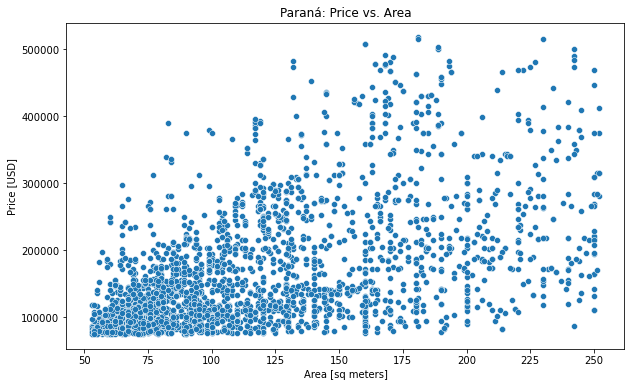

In [24]:
# Finding the state with the largest number of properties in df_south
largest_state = homes_by_state.idxmax()

# Filtering df_south for the largest state
largest_state_data = df_south[df_south['state'] == largest_state]

# Creating a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='area_m2', y='price_usd', data=largest_state_data)

# Adding labels and title
plt.xlabel("Area [sq meters]")
plt.ylabel("Price [USD]")
plt.title(f"{largest_state}: Price vs. Area")

# Showing the plot
plt.show()

TASK 3.9.1: Create a dictionary `south_states_corr`, where the keys are the names of the three states in the `"South"` region of Brazil, and their associated values are the correlation coefficient between `"area_m2"` and `"price_usd"` in that state.

As an example, here's a dictionary with the states and correlation coefficients for the Southeast region. Since you're looking at a different region, the states and coefficients will be different, but the structure of the dictionary will be the same.

As an example, here's a dictionary with the states and correlation coefficients for the Southeast region. Since you're looking at a different region, the states and coefficients will be different, but the structure of the dictionary will be the same.

```python
{'Espírito Santo': 0.6311332554173303,
 'Minas Gerais': 0.5830029036378931,
 'Rio de Janeiro': 0.4554077103515366,
 'São Paulo': 0.45882050624839366}
```

In [25]:
# Creating a dictionary to store correlation coefficients for each state in the "South" region
south_states_corr = {}

# Get unique states in the "South" region
south_states = df_south['state'].unique()

# Calculating correlation coefficient for each state
for state in south_states:
    state_data = df_south[df_south['state'] == state]
    correlation_coefficient = state_data['area_m2'].corr(state_data['price_usd'])
    south_states_corr[state] = correlation_coefficient

# Displaying the resulting dictionary
south_states_corr


{'Paraná': 0.5499169035013576,
 'Rio Grande do Sul': 0.5773267433717684,
 'Santa Catarina': 0.506812177636678}

# Findings
This analysis provided valuable insights into the Brazilian real estate market. I addressed data inconsistencies, explored pricing patterns, and delved into regional variations. Key numerical findings include the distribution of home prices, identification of outliers in home sizes, and regional mean price variations.

# Visualizations

1. Histogram: Explored the distribution of home prices in USD. Found that the majority of homes are priced below $500,000.

2. Boxplot: Investigated the distribution of home sizes in square meters. Identified some outliers in the area_m2 column.

3. Bar Chart: Examined mean home prices by region, revealing regional pricing variations. The Southeast region had the highest mean prices.

4. Scatter Plot: Explored the relationship between price and area for the state with the largest number of properties in the South region. Identified some variability in the relationship.

## Region-wise Analysis

1. Analyzed mean home prices by region, providing insights into regional market trends. The Southeast region had the highest mean prices.
2. Examined the number of properties in each state in the South region. Santa Catarina had the highest number of properties.
3. Explored the price vs. area relationship for the state with the most properties, Santa Catarina. Identified some variability in the relationship.
4. Calculated correlation coefficients between 'area_m2' and 'price_usd' for each state in the South region. Santa Catarina had a moderate positive correlation.

These findings provide a foundation for informed decision-making in Brazil's dynamic real estate landscape. 

## Potential Future Analysis
Further investigation could focus on addressing missing values, exploring outliers, and conducting a more in-depth regional analysis.